> **Họ và tên**: Đoàn Đặng Phương Nam <br> 
> **Lớp**: 22CLC02 <br>
> **MSSV**: 22127280 <br>
> **Môn học**: Toán ứng dụng và thống kê

<center>

### **ĐỒ ÁN THỰC HÀNH CUỐI KỲ**

*Học kỳ 3, năm học 2023 - 2024*; Lớp: **22CLC02-06**

</center>

**CÂU 1: (5 điểm) Data Fitting**

$\quad$ File "NHANES_age_prediction.csv" là bộ dữ liệu được thu thập vào năm 2013-2014 để đánh giá tình trạng sức khoẻ và dinh dưỡng của người cao tuổi (từ 65 tuổi trở lên) và người trẻ (dưới 65 tuổi) tại Hoa Kỳ

$\quad$ Bộ dữ liệu có 2278 dòng, mỗi dòng là thông tin của 01 người tham gia cuộc khảo sát và có 10 biến (xem mô tả các biến và tải bộ dữ liệu tại link https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset)

$\quad$ Bỏ qua biến "SEQN" (ID của người tham gia khảo sát) và biến "age_group" (nhóm tuổi mà người tham gia khảo sát thuộc về). Sau đó sử dụng phương pháp hồi quy tuyến tính để xây dựng mô hình dự báo bệnh tiểu đường (biến "DIQ010")

$\quad$ $\quad$ a) Sử dụng toàn bộ 7 biến đầu vào còn lại.

$\quad$ $\quad$ b) Sử dụng duy nhất 1 biến cho kết quả tốt nhất.

$\quad$ $\quad$ c) Xây dựng một mô hình của riêng bạn cho kết quả tốt nhất.

**YÊU CẦU CHUNG**

$\quad$ \- Sinh viên thực hiện bài làm cá nhân (không làm theo nhóm)

$\quad$ \- Sinh viên không được dùng thư viện và các hàm có sẵn của các thư viện (chỉ được dùng thư viện pandas cho việc nạp dữ liệu, thư viện matplotlib hoặc seaborn để vẽ hình, thư viện math để thực hiện các tính toán xấp xỉ để khắc phục sai số của máy tính)

**QUY ĐỊNH BÀI NỘP**

$\quad$ \- Thực hiện mỗi câu trong 01 tập tin Jupyter Notebook (.ipynb) theo quy định sau:

   + Tên tập tin đặt theo cấu trúc: **MSSV_cau1.ipynb**, **MSSV_cau2.ipynb**
   + Mở đầu tập tin là đoạn văn bản giới thiệu thông tin cá nhân: Lớp, MSSV, Họ và tên SV
   + Mỗi tập tin mã nguồn chứa toàn bộ bài làm và toàn bộ ví dụ áp dụng theo yêu cầu. Ghi chú ý nghĩa (chức năng) của các hàm tự viết (tại nơi định nghĩa hàm)

$\quad$ \- Sinh viên đặt toàn bộ các tập tin bài làm trong 01 tập tin nén **MSSV.zip** hoặc **MSSV.rar**, và nộp tập tin nén này trên website môn học (Moodle) théo đúng thời hạn quy định.

**QUY ĐỊNH CHẤM BÀI**

$\quad$ Những trường hợp sau đây sẽ bị 0 điểm toàn bộ bài thi.

   + Nộp bài sai quy định
   + Thực thi mã nguồn báo lỗi
   + **<p style="color: red; ">Sao chép bài làm của nhau</p>**

<center>

**HẾT**

</center>

## **1. Import những thư viện cần thiết**

In [81]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

## **2. Đọc dữ liệu**

In [82]:
# Read data from wine.csv file
data = pd.read_csv("NHANES_age_prediction.csv", sep = ",")

In [83]:
# Review the data
data.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


In [85]:
# Clean the data and split it into two parts: features and label
numSamples, numFeatures = data.shape
cleanedData = [list(data.iloc[i]) for i in range (numSamples)]

features = [[cleanedData[i][j] for j in range (2, numFeatures) if j != numFeatures - 3] for i in range (numSamples)]
labels = [cleanedData[i][numFeatures - 3] for i in range (numSamples)]

## **3. Xây dựng những hàm hỗ trợ**

In [87]:
# Support functions
def checkMatrix (matrix: list[list[float]]) -> bool:
    """
    The function checks if the length of all rows are similar
    """
    length = len(matrix[0])
    
    for i in range (1, len(matrix)):
        if (len(matrix[i]) != length):
            return False
        
    return True

def transposeMatrix (matrix: list[list[float]]) -> list[list[float]]:
    """
    This function is created to transpose a matrix
    """
    if not checkMatrix(matrix):
        raise Exception ("In the transposeMatrix function, check the inputted matrix again")
    
    return [[matrix[i][j] for i in range (len(matrix))] for j in range (len(matrix[0]))]

def L2_Norm (vector: list[float]) -> float:
    """
    This function calculates the Euclidean norm of a vector
    """
    def innerProduct (vector1: list[float], vector2: list[float]) -> float:
        """
        This function calculates the inner product (will be simply comprehended as dot product) between two vectors
        """
        return sum([vector1[i] * vector2[i] for i in range (len(vector1))])
    
    return (innerProduct(vector, vector)) ** 0.5

def multiplyTwoMatrices (matrix1: list[list[float]], matrix2: list[list[float]]):
    """
    This function calculates the multiplication of two matrices
    """
    if (not checkMatrix(matrix1) or not checkMatrix(matrix2)):
        raise Exception ("In the multiplyTwoMatrices function, check your two inputted matrices again")
    
    if (len(matrix1[0]) != len(matrix2)):
        raise Exception ("The number of columns in the first matrix is different from the number of rows in the second matrix")
    
    return [[sum([matrix1[i][k] * matrix2[k][j] for k in range (len(matrix1[0]))]) for j in range (len(matrix2[0]))] 
            for i in range (len(matrix1))]    
    
def addTwoMatrices (matrix1: list[list[float]], matrix2: list[list[float]]):
    """
    This function helps to return the sum of two matrices
    """
    def addTwoVectors (vector1: list[float], vector2: list[float]):
        """
        This function is created to add a vector to another vector
        """
        return [element1 + element2 for element1, element2 in zip(vector1, vector2)]
    
    if (not checkMatrix(matrix1) or not checkMatrix(matrix2)):
        raise Exception ("In the addTwoMatrices function, check your two inputted matrices again")
    
    if (len(matrix1) != len(matrix2) or len(matrix1[0]) != len(matrix2[0])):
        raise Exception ("Two matrices must have the similar shape before adding")
    
    return [addTwoVectors(matrix1[i], matrix2[i]) for i in range (len(matrix1))]

def multiplyMatrixByScalar (matrix: list[list[float]], scalar: float):
    """
    This function helps to multiply a matrix by a scalar
    """
    def multiplyVectorByScalar (vector: list[float], scalar: float) -> list[float]:
        """
        This function is created to multiply a vector by scalar
        """
        return [element * scalar for element in vector]
    
    if not checkMatrix(matrix):
        raise Exception ("In the multiplyMatrixByScalar function, check your inputted matrix again")
    
    return [multiplyVectorByScalar(matrix[i], scalar) for i in range (len(matrix))]

In [88]:
def Inverse (squareMatrix: list[list[float]]):
    """
    This function simulates finding the inverse matrix of a square matrix
    """
    def identityMatrix (size: int):
        """
        This function helps to create an identity matrix, given a size
        """
        return [[int(j == i) for j in range (size)] for i in range (size)]

    def multiplyVectorByScalar (vector: list[float], scalar: float):
        """
        This function is created to multiply a vector by scalar
        """
        return [element * scalar for element in vector]

    def addTwoVectors (vector1: list[float], vector2: list[float]):
        """
        This function is created to add a vector to another vector
        """
        return [element1 + element2 for element1, element2 in zip(vector1, vector2)]

    def swapTwoRows (matrix: list[list[float]], index1: int, index2: int):
        """
        This function is created to swap two rows in a certain matrix
        """
        matrix[index1], matrix[index2] = matrix[index2], matrix[index1]
        
    #! Check the input
    if not checkMatrix(squareMatrix):
        raise Exception ("In the Inverse function, check the inputted matrix again")
    
    if (len(squareMatrix) != len(squareMatrix[0])):
        raise Exception ("In the Inverse function, the inputted matrix should be a square matrix")
        
    size = len(squareMatrix)
    
    #! Get the augmented matrix by combining the original square matrix and an identity matrix with the same size
    squareMatrix_copy = [[squareMatrix[i][j] for j in range (size)] for i in range (size)]
    identity_matrix = identityMatrix(size)
    
    augmentedMatrix = [element1 + element2 for element1, element2 in zip(squareMatrix_copy, identity_matrix)]
    
    #! Use the idea of Gauss-Jordan elimination to find the inverse matrix
    for i in range (0, size):
        #? From the current row, if all of values in the column are 0, we can conclude that the matrix is non-invertible
        if (all(augmentedMatrix[row][i] == 0 for row in range (i, size))):
            return None
        
        #? In the current column, choose the first row satisfying that the value at the position is different from 0
        pivotRow = i + [augmentedMatrix[row][i] != 0 for row in range (i, size)].index(True)
        swapTwoRows(augmentedMatrix, i, pivotRow)
        
        #? Convert the value at the current row and column into 1
        augmentedMatrix[i] = multiplyVectorByScalar(augmentedMatrix[i], 1 / augmentedMatrix[i][i])
        
        #? For each remaining row, add a appropriate scalar of the current row satisfying that the value in the current column is 0
        for j in range (0, size):
            if (j != i): #? Need not to update the current row
                augmentedMatrix[j] = addTwoVectors(augmentedMatrix[j], 
                                                multiplyVectorByScalar(augmentedMatrix[i], -augmentedMatrix[j][i]))
            
    return [[augmentedMatrix[i][j] for j in range (size, 2 * size)] for i in range (size)]

## **4. Xây dựng mô hình sử dụng toàn bộ 7 đặc trưng đề bài cung cấp**

In [89]:
def model_build_full_features (features: list[list[float]], labels: list[float]):
    """
    Input: The feature data and the corresponding label
    Output: The parameter (b1, b2, ..., bk) for the best fitting of the model y = b1x1 + ... + bkxk with the feature data 
    of k columns
    """
    if not checkMatrix(features):
        raise Exception ("In the model_build_full_features function, check the feature data matrix again")
    
    if (len(features) != len(labels)):
        raise Exception ("In the model_build_full_features function, the number of labels is different from the number of samples")
    
    X = [[1] + features[i] for i in range (len(features))]
    y = transposeMatrix([labels])
    
    parameters = multiplyTwoMatrices(Inverse(multiplyTwoMatrices(transposeMatrix(X), X)), multiplyTwoMatrices(transposeMatrix(X), y))
    
    errorVector = addTwoMatrices(y, multiplyMatrixByScalar(multiplyTwoMatrices(X, parameters), -1))
    RSS = L2_Norm([errorVector[i][0] for i in range (len(errorVector))]) ** 2
    
    return [parameters[i][0] for i in range (len(parameters))], RSS, multiplyTwoMatrices(X, parameters)

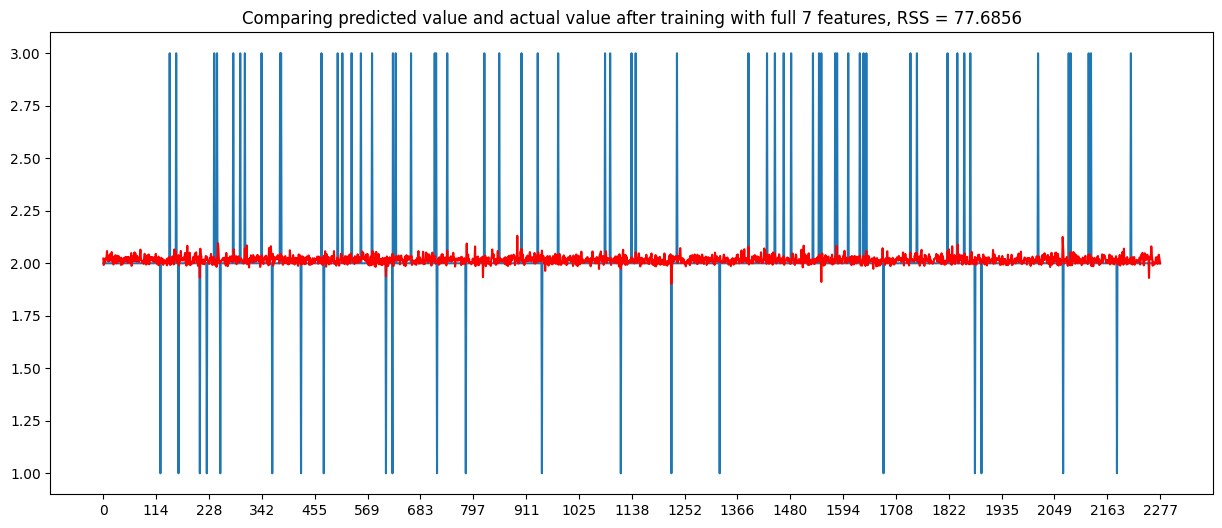

In [90]:
parameters, RSS, y_predicted = model_build_full_features(features, labels)

plt.figure(figsize = (15,6))

x = [i for i in range (len(features))]

minValue = min(x)
maxValue = max(x)

plt.plot(x, labels)
plt.plot(x, y_predicted, color = 'red')
plt.xticks([minValue + i * (maxValue - minValue) / 20 for i in range (21)])

plt.title(f"Comparing predicted value and actual value after training with full {len(features[0])} features, RSS = {round(RSS, 4)}");

## **5. Xây dựng mô hình sử dụng duy nhất 1 đặc trưng cho kết quả tốt nhất**

Sau khi tính **giá trị RSS** của cả 7 mô hình, em nhận thấy mô hình sử dụng thuộc tính ***LBXIN*** cho giá trị RSS thấp nhất, đồng nghĩa với việc mô hình đó là **tốt nhất** trong 7 mô hình được xét

In [91]:
def model_build_each_feature (features: list[list[float]], labels: list[float]):
    """
    Input: The feature data and the corresponding label
    Output: With the ith feature, return the tuple of two parameters (ai, bi) for the linear model: y = ai + bi*xi, besides its RSS value
    """
    if not checkMatrix(features):
        raise Exception ("In the model_build_each_feature function, check the feature data matrix again")
    
    if (len(features) != len(labels)):
        raise Exception ("In the model_build_each_feature function, the number of labels is different from the number of samples")
    
    listTupleParameters = []
    listRSSValues = []
    
    numFeatures = len(features[0])
    y = transposeMatrix([labels])
    
    for j in range (numFeatures):
        X = [[1] + [features[i][j]] for i in range (len(features))]
        
        parameters = multiplyTwoMatrices(Inverse(multiplyTwoMatrices(transposeMatrix(X), X)), multiplyTwoMatrices(transposeMatrix(X), y))
        listTupleParameters.append(tuple([parameters[i][0] for i in range (len(parameters))]))
        
        errorVector = addTwoMatrices(y, multiplyMatrixByScalar(multiplyTwoMatrices(X, parameters), -1))
        listRSSValues.append(L2_Norm([errorVector[i][0] for i in range (len(errorVector))]) ** 2)
        
    return listTupleParameters, listRSSValues

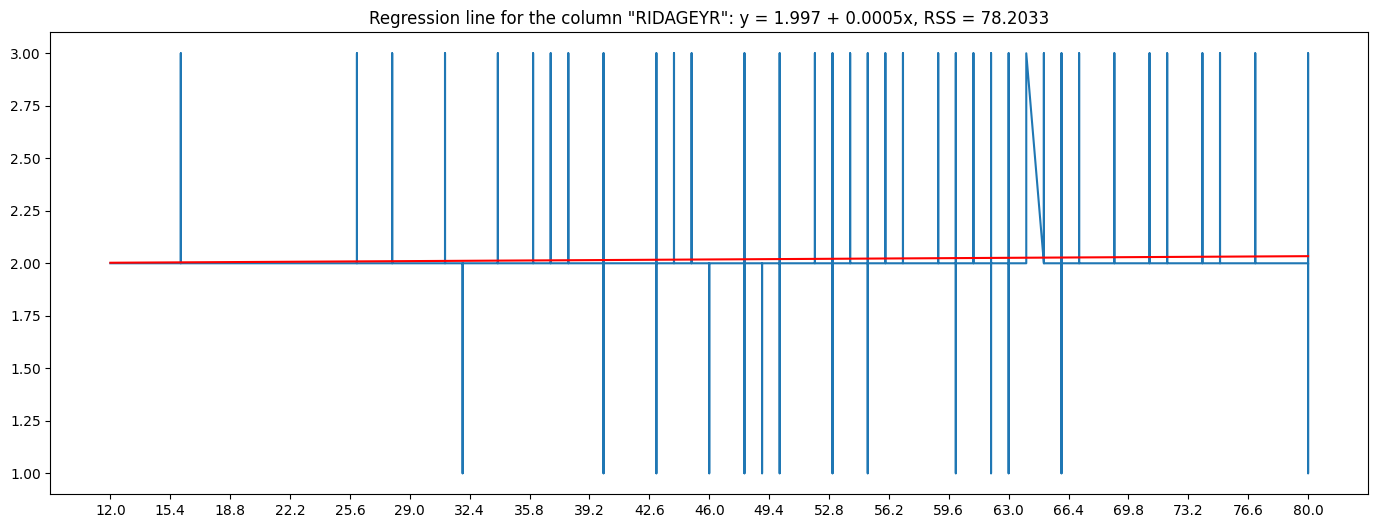

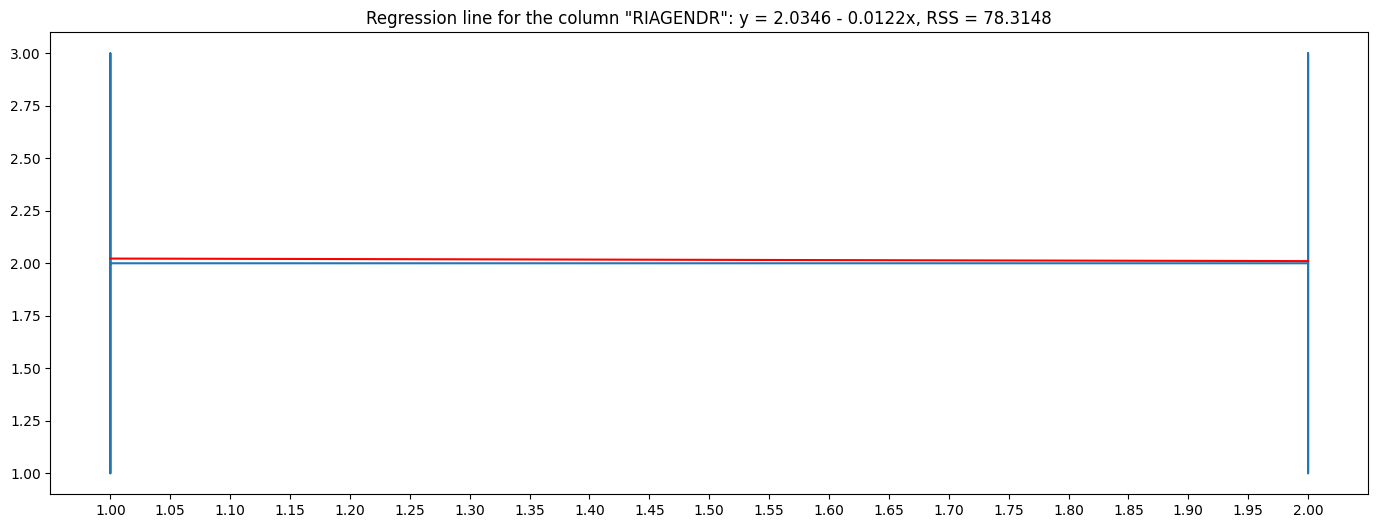

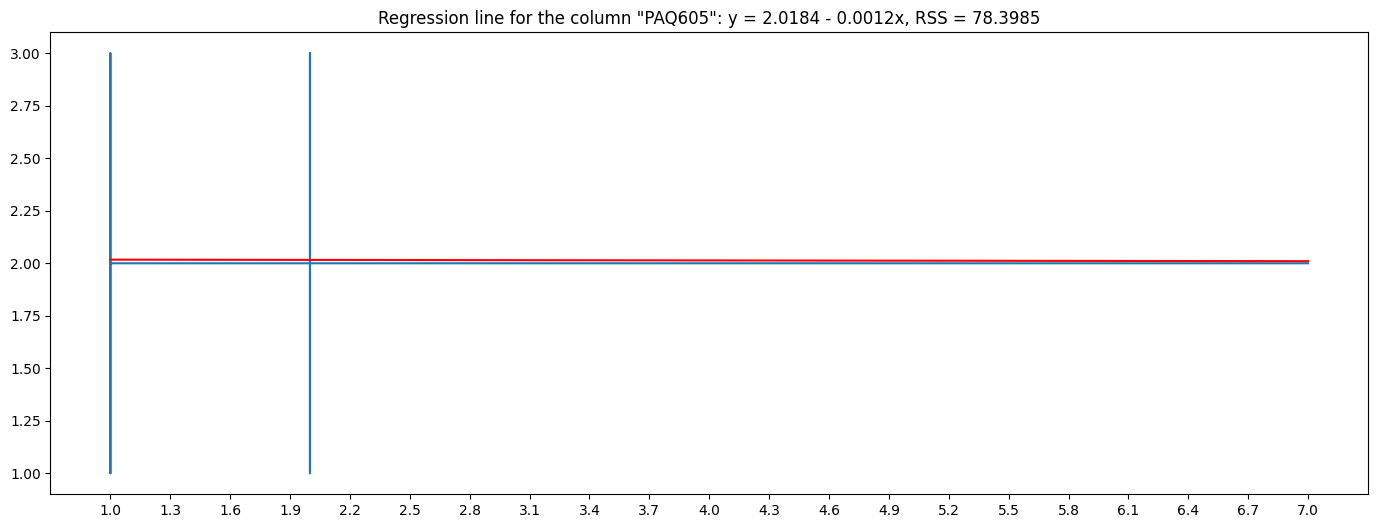

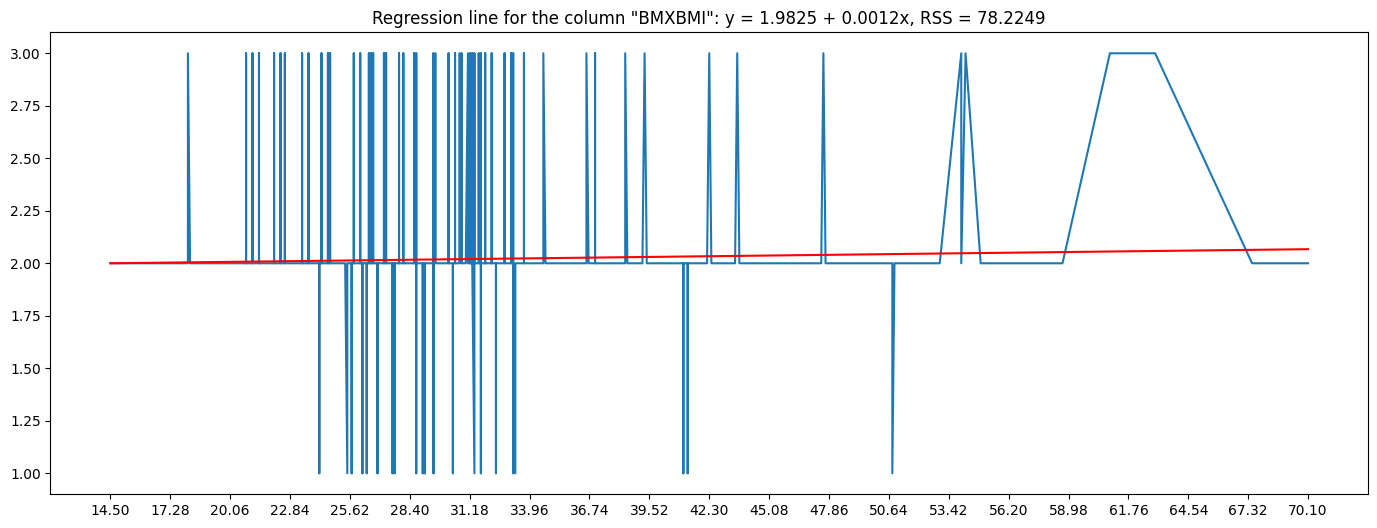

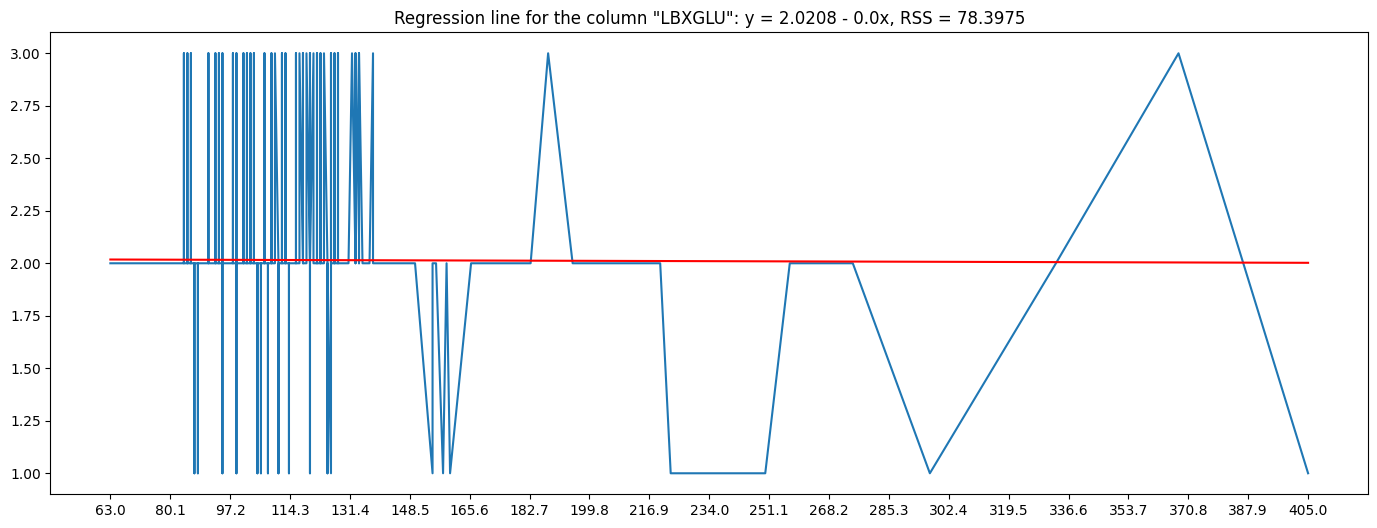

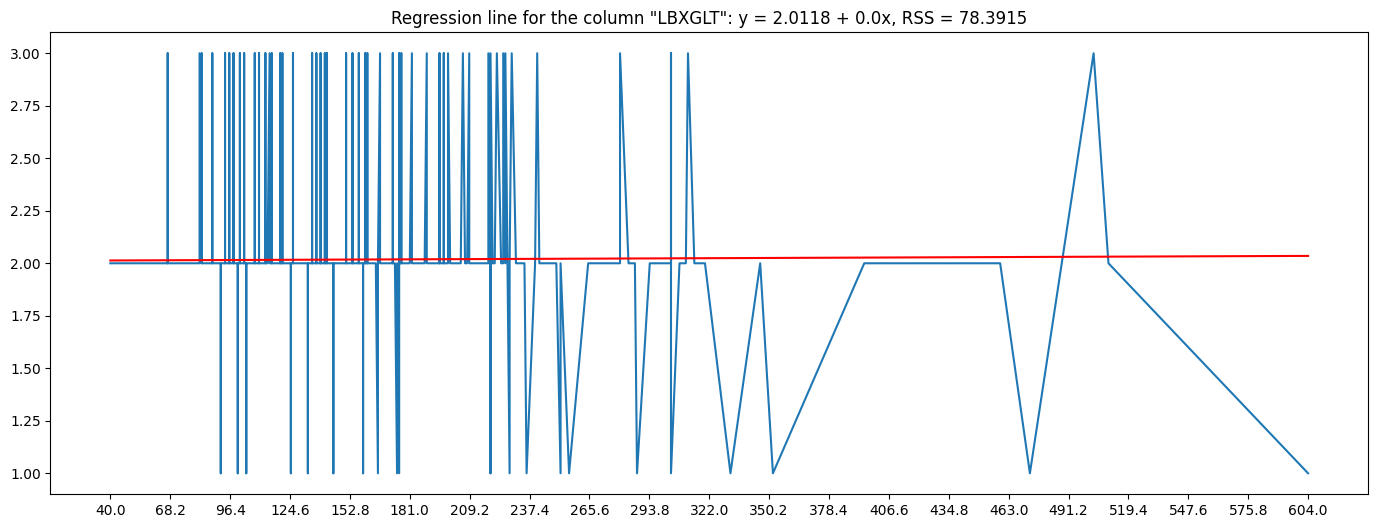

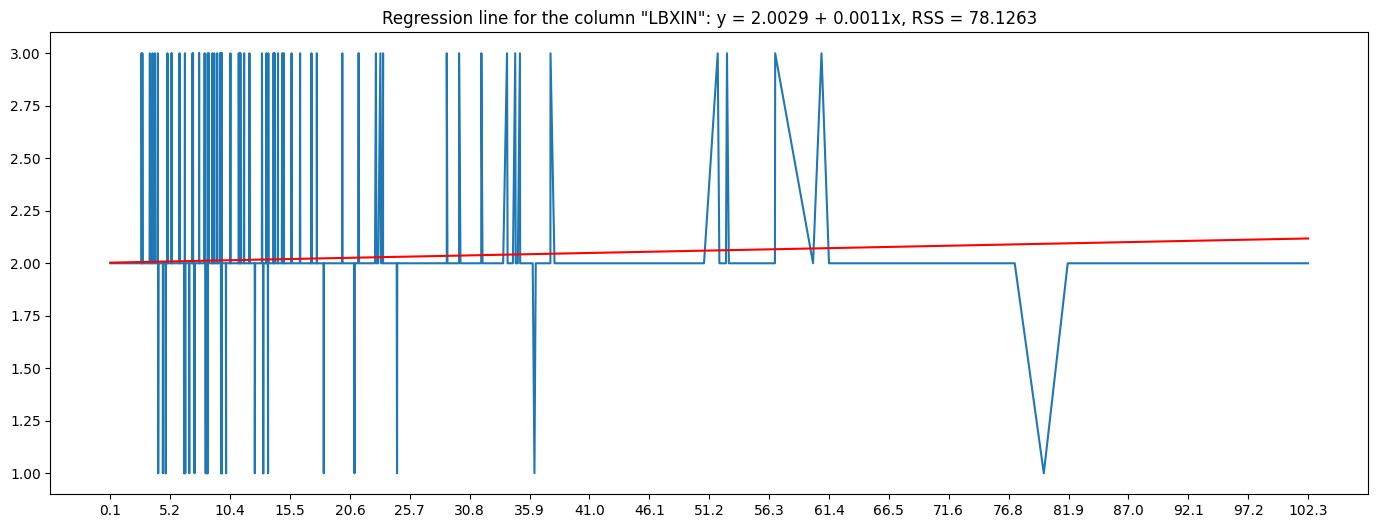

In [92]:
listTupleParameters, listRSSValues = model_build_each_feature(features, labels)
columns = list(data.columns)[2:]
columns.remove('DIQ010')

for i in range (len(features[0])):
    plt.figure(figsize = (17,6))
    
    x = [features[j][i] for j in range (len(features))]
    points = [(x[i], labels[i]) for i in range (len(x))]
    points.sort(key = lambda x: x[0])
    
    x = [points[i][0] for i in range (len(points))]
    y = [points[i][1] for i in range (len(points))]
    
    minValue = min(x)
    maxValue = max(x)
    
    plt.plot(x, y)
    plt.plot(x, [listTupleParameters[i][0] + listTupleParameters[i][1] * x[j] for j in range (len(x))], color = 'red')
    plt.xticks([round(minValue + i * (maxValue - minValue) / 20, 4) for i in range (21)])
    
    sign = "+" if listTupleParameters[i][1] > 0 else "-"
    plt.title(f"Regression line for the column \"{columns[i]}\": y = {round(listTupleParameters[i][0], 4)} {sign} {abs(round(listTupleParameters[i][1], 4))}x, RSS = {round(listRSSValues[i], 4)}")

## **6. Thực nghiệm để tìm mô hình tốt nhất có thể**

Ở bước này, ý tưởng của em như sau:

Đầu tiên, em xét tất cả mô hình có dạng 
$$ y = \theta_0 + \sum_{i} \theta_i x_i $$
trong đó các $x_i$ tạo thành 1 tập là tập con khác rỗng của $X = {x_1, x_2, ..., x_7}$, như vậy, sẽ có tất cả 127 mô hình khác nhau được em xem xét, mục tiêu là tìm ra mô hình cho ra **RSS** nhỏ nhất sau khi đã khớp dữ liệu. Kết quả sau khi em thực nghiệm cho thấy mô hình sử dụng toàn bộ 7 đặc trưng sẽ cho ra **RSS** nhỏ nhất.

Tiếp theo, tận dụng hàm cũ em đã làm ở Lab 5, em có được hàm mô hình mới cho câu c như sau:
$$ y = \theta_0 + \sum_{i = 1}^7 \theta_i x_i + \sum_{i = 1}^7 \sum_{j = i + 1}^7 \phi_{ij} x_i x_j + \sum_{i = 1}^7 \sum_{j = i + 1}^7 \sum_{k = j + 1}^7 \mu_{ijk} x_i x_j x_k + \sum_{i = 1}^7 \sum_{j = i + 1}^7 \sum_{k = j + 1}^7 \sum_{t = k + 1}^7 \lambda_{ijkt} x_i x_j x_k x_t + \sum_{i = 1}^7 \sum_{j = i + 1}^7 \sum_{k = j + 1}^7 \sum_{t = k + 1}^7 \sum_{r = t + 1}^7 \omega_{ijktr} x_i x_j x_k x_t x_r + \\ \sum_{i = 1}^7 \sum_{j = i + 1}^7 \sum_{k = j + 1}^7 \sum_{t = k + 1}^7 \sum_{r = t + 1}^7 \sum_{m = r + 1}^7 \alpha_{ijktrm} x_i x_j x_k x_t x_r x_m + \beta x_1 x_2 x_3 x_4 x_5 x_6 x_7$$

In [93]:
def model_build_full_features_modify (features: list[list[float]], labels: list[float]):
    """
    This function proposes a function which returns a more effective RSS value compared with two above requirements
    """
    if not checkMatrix(features):
        raise Exception ("In the model_build_full_features function, check the feature data matrix again")
    
    if (len(features) != len(labels)):
        raise Exception ("In the model_build_full_features function, the number of labels is different from the number of samples")
    
    X = []
    for i in range (len(features)):
        x = [1] + features[i]
        for p in range (len(features[i])):
            for q in range (p + 1, len(features[i])):
                x.append((features[i][p] * features[i][q]))
                
        for p in range (len(features[i])):
            for q in range (p + 1, len(features[i])):
                for r in range (q + 1, len(features[i])):
                    x.append((features[i][p] * features[i][q] * features[i][r]))
                    
        for p in range (len(features[i])):
            for q in range (p + 1, len(features[i])):
                for r in range (q + 1, len(features[i])):
                    for t in range (r + 1, len(features[i])):
                        x.append((features[i][p] * features[i][q] * features[i][r] * features[i][t]))
                        
        for p in range (len(features[i])):
            for q in range (p + 1, len(features[i])):
                for r in range (q + 1, len(features[i])):
                    for t in range (r + 1, len(features[i])):
                        for m in range (t + 1, len(features[i])):
                            x.append((features[i][p] * features[i][q] * features[i][r] * features[i][t] * features[i][m]))
                            
        for p in range (len(features[i])):
            for q in range (p + 1, len(features[i])):
                for r in range (q + 1, len(features[i])):
                    for t in range (r + 1, len(features[i])):
                        for m in range (t + 1, len(features[i])):
                            for n in range (m + 1, len(features[i])):
                                x.append((features[i][p] * features[i][q] * features[i][r] * features[i][t] * features[i][m] * features[i][n]))
                                
        for p in range (len(features[i])):
            for q in range (p + 1, len(features[i])):
                for r in range (q + 1, len(features[i])):
                    for t in range (r + 1, len(features[i])):
                        for m in range (t + 1, len(features[i])):
                            for n in range (m + 1, len(features[i])):
                                for f in range (n + 1, len(features[i])):
                                    x.append((features[i][p] * features[i][q] * features[i][r] * features[i][t] * features[i][m] * features[i][n] * features[i][f]))
                
        X.append(x)
    
    y = transposeMatrix([labels])
    
    parameters = multiplyTwoMatrices(Inverse(multiplyTwoMatrices(transposeMatrix(X), X)), multiplyTwoMatrices(transposeMatrix(X), y))
    
    errorVector = addTwoMatrices(y, multiplyMatrixByScalar(multiplyTwoMatrices(X, parameters), -1))
    RSS = L2_Norm([errorVector[i][0] for i in range (len(errorVector))]) ** 2
    
    return [parameters[i][0] for i in range (len(parameters))], RSS, multiplyTwoMatrices(X, parameters)

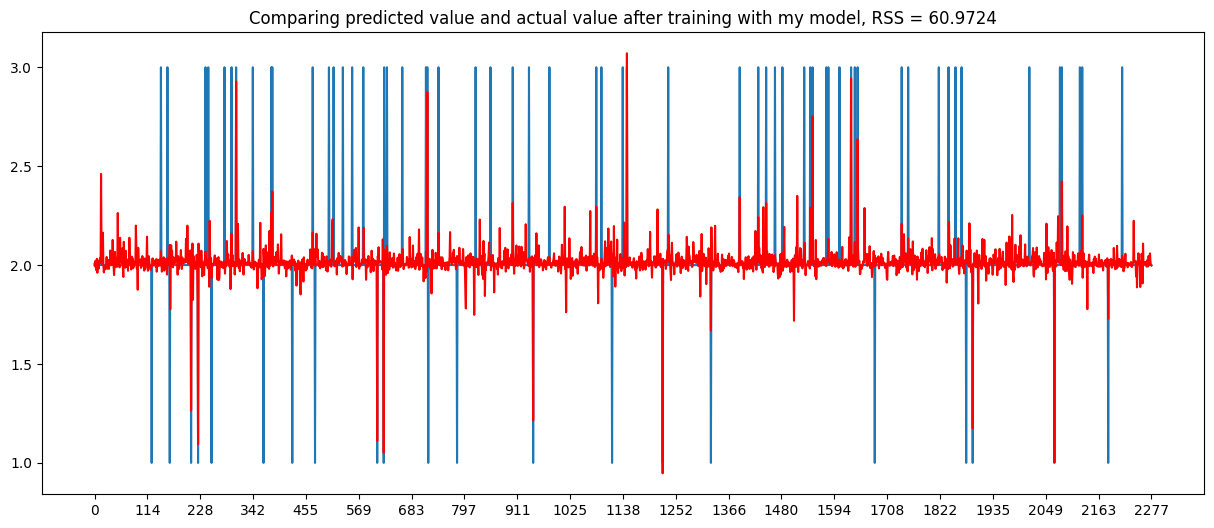

In [94]:
_, RSS, y_predicted = model_build_full_features_modify(features, labels)

plt.figure(figsize = (15,6))

x = [i for i in range (len(features))]

minValue = min(x)
maxValue = max(x)

plt.plot(x, labels)
plt.plot(x, y_predicted, color = 'red')
plt.xticks([minValue + i * (maxValue - minValue) / 20 for i in range (21)])

plt.title(f"Comparing predicted value and actual value after training with my model, RSS = {round(RSS, 4)}");